# Machine Learning Models

In [1]:
#Import packages and set formatting options

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Read CSV File

In [2]:
df = pd.read_csv('feature_selected_train.csv')
df.head()

,AMT_INCOME_TOTAL,APARTMENTS_MODE,BASEMENTAREA_AVG,ENTRANCES_AVG,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_MODE,LANDAREA_AVG,LIVE_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE,NONLIVINGAREA_MODE,OCCUPATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BIRTH,YEARS_BUILD_MODE,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE,TARGET
0,270000.0,0.0924,0.0529,0.0345,0.311267,0.622246,0.481121,0.2917,0.0130,0,Higher education,0.0000,Core staff,0.003541,1,0,0.0714,0.9851,45.931507,0.8040,3.254795,2.268493,0
1,225000.0,0.1502,0.0973,0.1379,0.478860,0.566907,0.770087,0.3333,0.0931,0,Secondary / secondary special,0.0000,Drivers,0.016612,2,0,0.1417,0.9806,38.591781,0.7452,8.295890,0.010959,0
2,189000.0,0.3561,0.1335,0.1724,0.721940,0.642656,0.481121,0.6667,0.1758,0,Secondary / secondary special,0.1060,Laborers,0.010006,2,0,0.3811,0.9985,39.953425,0.9804,0.556164,0.515068,0
3,112500.0,0.0284,0.0617,0.1034,0.478860,0.706428,0.556727,0.0833,0.0279,0,Secondary / secondary special,0.0000,Laborers,0.046220,1,0,0.0238,0.9881,48.542466,0.8432,21.380822,0.654795,0
4,135000.0,0.1460,0.1455,0.3103,0.478860,0.786179,0.565608,0.1667,0.0861,1,Secondary / secondary special,0.0045,Drivers,0.026392,2,0,0.0967,0.9861,30.920548,0.8171,2.043836,0.010959,0


In [3]:
df.shape

(80603, 23)

### Categorical Variable Encoding
After examining the cleaned and reduced training set, there are still two categorical variables that will need to be encoded before applying any machine learning models. Let's examine those first.

In [4]:
df['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    54306
Higher education                 22086
Incomplete higher                 3530
Lower secondary                    633
Academic degree                     48
Name: NAME_EDUCATION_TYPE, dtype: int64

Since there is a clear ordinal value to the categories - Education levels have a clear hierarchy from Lower secondary to Secondary/ secondary special, we can use label encoding to convert text values into numerical values.

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
#Can also use replace to set numerical values for each education type
#Can also use one hot encoding

df['NAME_EDUCATION_TYPE'] = le.fit_transform(df['NAME_EDUCATION_TYPE'])

In [7]:
df.head()

,AMT_INCOME_TOTAL,APARTMENTS_MODE,BASEMENTAREA_AVG,ENTRANCES_AVG,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_MODE,LANDAREA_AVG,LIVE_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE,NONLIVINGAREA_MODE,OCCUPATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BIRTH,YEARS_BUILD_MODE,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE,TARGET
0,270000.0,0.0924,0.0529,0.0345,0.311267,0.622246,0.481121,0.2917,0.0130,0,1,0.0000,Core staff,0.003541,1,0,0.0714,0.9851,45.931507,0.8040,3.254795,2.268493,0
1,225000.0,0.1502,0.0973,0.1379,0.478860,0.566907,0.770087,0.3333,0.0931,0,4,0.0000,Drivers,0.016612,2,0,0.1417,0.9806,38.591781,0.7452,8.295890,0.010959,0
2,189000.0,0.3561,0.1335,0.1724,0.721940,0.642656,0.481121,0.6667,0.1758,0,4,0.1060,Laborers,0.010006,2,0,0.3811,0.9985,39.953425,0.9804,0.556164,0.515068,0
3,112500.0,0.0284,0.0617,0.1034,0.478860,0.706428,0.556727,0.0833,0.0279,0,4,0.0000,Laborers,0.046220,1,0,0.0238,0.9881,48.542466,0.8432,21.380822,0.654795,0
4,135000.0,0.1460,0.1455,0.3103,0.478860,0.786179,0.565608,0.1667,0.0861,1,4,0.0045,Drivers,0.026392,2,0,0.0967,0.9861,30.920548,0.8171,2.043836,0.010959,0


Next, we will encode Occupation Type. Since there is no clear ordinal positioning between different occupations, we will use One Hot Encoding. We will use the pandas function get_dummies().

In [8]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 18363
Others                   13289
Sales staff              10219
Core staff                8379
Managers                  6415
Drivers                   5964
High skill tech staff     3966
Accountants               3263
Medicine staff            2463
Security staff            1981
Cooking staff             1718
Cleaning staff            1456
Private service staff      917
Low-skill Laborers         644
Secretaries                471
Waiters/barmen staff       406
Realty agents              280
HR staff                   209
IT staff                   200
Name: OCCUPATION_TYPE, dtype: int64

In [9]:
df = pd.get_dummies(df, columns = ['OCCUPATION_TYPE'], drop_first = True)

The feature OCCUPATION_TYPE has been one hot encoded. The dataset is ready for modeling.

In [10]:
df.head()

,AMT_INCOME_TOTAL,APARTMENTS_MODE,BASEMENTAREA_AVG,ENTRANCES_AVG,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLOORSMAX_MODE,LANDAREA_AVG,LIVE_CITY_NOT_WORK_CITY,NAME_EDUCATION_TYPE,NONLIVINGAREA_MODE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REG_CITY_NOT_LIVE_CITY,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BIRTH,YEARS_BUILD_MODE,YEARS_EMPLOYED,YEARS_LAST_PHONE_CHANGE,TARGET,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Others,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,270000.0,0.0924,0.0529,0.0345,0.311267,0.622246,0.481121,0.2917,0.0130,0,1,0.0000,0.003541,1,0,0.0714,0.9851,45.931507,0.8040,3.254795,2.268493,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,225000.0,0.1502,0.0973,0.1379,0.478860,0.566907,0.770087,0.3333,0.0931,0,4,0.0000,0.016612,2,0,0.1417,0.9806,38.591781,0.7452,8.295890,0.010959,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,189000.0,0.3561,0.1335,0.1724,0.721940,0.642656,0.481121,0.6667,0.1758,0,4,0.1060,0.010006,2,0,0.3811,0.9985,39.953425,0.9804,0.556164,0.515068,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,112500.0,0.0284,0.0617,0.1034,0.478860,0.706428,0.556727,0.0833,0.0279,0,4,0.0000,0.046220,1,0,0.0238,0.9881,48.542466,0.8432,21.380822,0.654795,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,135000.0,0.1460,0.1455,0.3103,0.478860,0.786179,0.565608,0.1667,0.0861,1,4,0.0045,0.026392,2,0,0.0967,0.9861,30.920548,0.8171,2.043836,0.010959,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Applying Machine Learning Models

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [12]:
#start with logistic regression
#split dataframe into X (dependent variables - all features except target) and y (independent variable - target variable)
X = df[df.columns[~df.columns.isin(['TARGET'])]].copy()
y = df['TARGET'].copy()

In [13]:
#split data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [109]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [110]:
predictions = rf.predict(X_test)

In [116]:
len(predictions) #2191, 16121 total

16121

In [117]:
rf.score(X_test, y_test)

0.6263754254323426

In [104]:
y_train.value_counts()

0    49097
1    15385
Name: TARGET, dtype: int64

In [14]:
y_test.shape

(16121,)

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#predict output with X test set
y_pred = logreg.predict(X_test)

In [107]:
y_test.value_counts()

0    12275
1     3846
Name: TARGET, dtype: int64

In [44]:
logreg.score(X_test,y_test)

0.7614291917374852

In [65]:
#this will output predicted values from the model given X_test, which is the smaller part of train test split that model has not seen
logreg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [100]:
#this will predict probability of class membership for X_test testing set
#first list entry is P(target = 0) and second list entry is P(target = 1)

logreg.predict_proba(X_test)[:100]

array([[0.77335189, 0.22664811],
       [0.76735424, 0.23264576],
       [0.82849428, 0.17150572],
       [0.78296216, 0.21703784],
       [0.78892095, 0.21107905],
       [0.85132194, 0.14867806],
       [0.72482803, 0.27517197],
       [0.77148431, 0.22851569],
       [0.7066326 , 0.2933674 ],
       [0.76299884, 0.23700116],
       [0.68685383, 0.31314617],
       [0.77642724, 0.22357276],
       [0.75570354, 0.24429646],
       [0.82618947, 0.17381053],
       [0.78532881, 0.21467119],
       [0.71176963, 0.28823037],
       [0.74758156, 0.25241844],
       [0.84004635, 0.15995365],
       [0.80471099, 0.19528901],
       [0.72974377, 0.27025623],
       [0.67430577, 0.32569423],
       [0.83658639, 0.16341361],
       [0.86016731, 0.13983269],
       [0.77325899, 0.22674101],
       [0.71957185, 0.28042815],
       [0.70109432, 0.29890568],
       [0.78280216, 0.21719784],
       [0.77609458, 0.22390542],
       [0.69920502, 0.30079498],
       [0.72527584, 0.27472416],
       [0.

In [85]:
#changing sensitivity and specificity?

from sklearn.metrics import accuracy_score
accuracy_score(y_test, logreg.predict(X_test), normalize = False)

12275

In [55]:
y_test[y_test ==1].shape  #16121 for y_pred, 12275+3846 = 16121

(3846,)

In [57]:
#Try log reg with different values for c

def reg_param_c(X,y, c_values, test_size):
    c_scores = {}
    for i in c_values:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)
        logreg = LogisticRegression(C = i)
        logreg.fit(X_train, y_train)
        c_scores[i] = accuracy_score(y_test, logreg.predict(X_test))
    return c_scores

In [60]:
reg_param_c(X,y, [0.001, 0.1, 1, 10, 100], 0.2)

{0.001: 0.7625457477823956,
 0.1: 0.7678804044414118,
 1: 0.7647788598722164,
 10: 0.7616773153030209,
 100: 0.756156565969853}

In [89]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

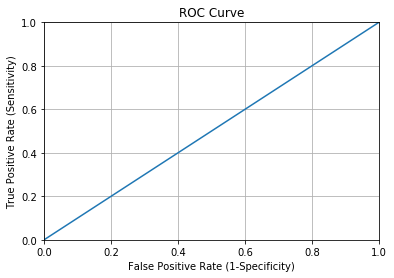

In [90]:
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [79]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1- fpr[thresholds > threshold][-1])

In [82]:
evaluate_threshold(0.35)

Sensitivity: 0.0
Specificity: 1.0


In [88]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.5

In [94]:
#What parameters to tune to have predictions that are 1 and 0

61372